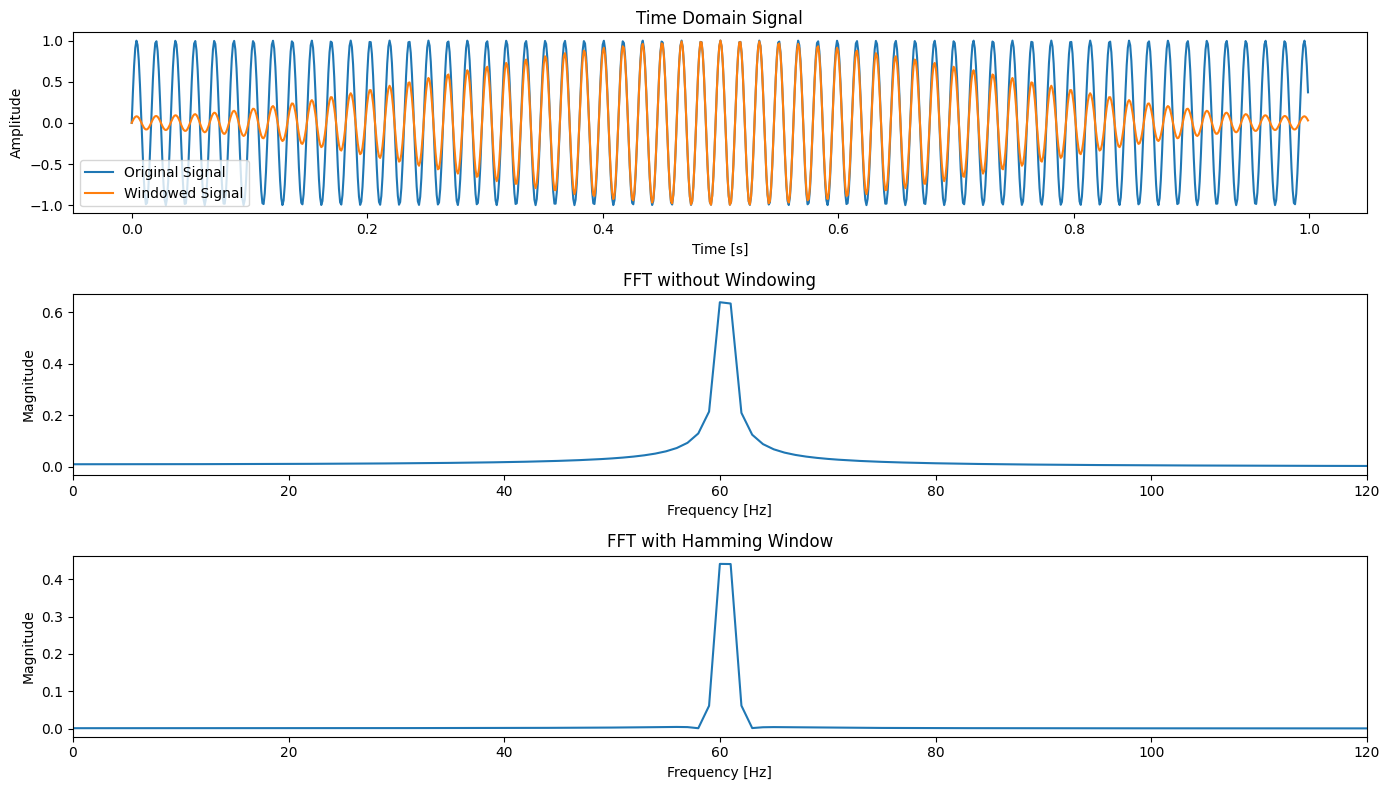

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import get_window

# Signal parameters
fs = 1000  # Sampling frequency
T = 1.0 / fs  # Sampling interval
N = 1000  # Number of samples
t = np.linspace(0.0, N*T, N, endpoint=False)  # Time vector
f_signal = 60.5  # Signal frequency (non-integer multiple of sampling frequency)

# Generate a sine wave
signal = np.sin(2 * np.pi * f_signal * t)

# Compute the FFT without windowing
signal_fft = fft(signal)
frequencies = fftfreq(N, T)

# Apply a Hamming window to the signal
window = get_window('hamming', N)
windowed_signal = signal * window

# Compute the FFT with windowing
windowed_signal_fft = fft(windowed_signal)

# Plotting
plt.figure(figsize=(14, 8))

# Time domain signal
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.plot(t, windowed_signal, label='Windowed Signal')
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# FFT without windowing
plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], np.abs(signal_fft[:N//2]) * 2.0 / N)
plt.title('FFT without Windowing')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 120)
# FFT with windowing
plt.subplot(3, 1, 3)
plt.plot(frequencies[:N//2], np.abs(windowed_signal_fft[:N//2]) * 2.0 / N)
plt.title('FFT with Hamming Window')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 120)

plt.tight_layout()
plt.show()
